In [1]:
import pandas as pd
import numpy as np

In [17]:
data= pd.read_csv(r"C:\Users\diyas\Documents\Recommendation_system\MasterDataset.csv")

In [18]:
#number of missing ctc and tier values
print(data['TierLevel'].isnull().sum())
print(data['CTC'].isnull().sum())

59
51


In [19]:
#Main function
def PreprocessCTC(data):
    #convert CTC to standard format
    df=data
    for idx, row in df.iterrows():
        if row.CTC > 100:
            data.set_value(idx, 'CTC', row.CTC/100000)
    return(data)

def TierProcess(data):
    df_ctc=PreprocessCTC(data)
    df_ctc['CTC'] = pd.to_numeric(df_ctc['CTC'],errors='coerce')
    #map CTC to Tier level based on 2021 Tier mapping
    for idx, row in data.iterrows():
        if np.isnan(row.TierLevel):
            #print(row.CTC) #mostly all 0 are printed here
            if row.CTC > 0 and row.CTC <= 5:
                df_ctc.set_value(idx, 'TierLevel', 3)
            if row.CTC > 5 and row.CTC <= 10:
                df_ctc.set_value(idx, 'TierLevel', 2)
            if row.CTC > 10:
                df_ctc.set_value(idx, 'TierLevel', 1)
    return(df_ctc)
    
df_final=TierProcess(data)

In [20]:
print(df_final['TierLevel'].isnull().sum())
print(df_final['CTC'].isnull().sum())

59
51


In [21]:
df=df_final
df1 = df[df['TierLevel'] == 1]
df2 = df[df['TierLevel'] == 2]
df3 = df[df['TierLevel'] == 3]
print("Tier 1 count",len(df1))
print("Tier 2 count",len(df2))
print("Tier 3 count",len(df3))

Tier 1 count 208
Tier 2 count 53
Tier 3 count 18


Tier 1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222F26E6780>]],
      dtype=object)

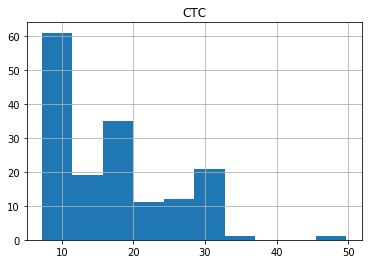

In [22]:
print("Tier 1")
df1.hist(column=["CTC"])



Tier 2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222F26E6748>]],
      dtype=object)

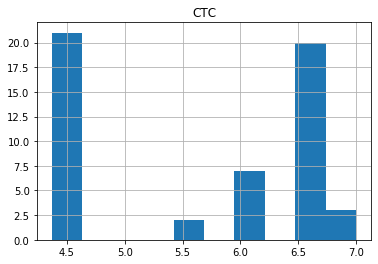

In [23]:
print("Tier 2")
df2.hist(column=["CTC"])


Tier 3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222F4EE1128>]],
      dtype=object)

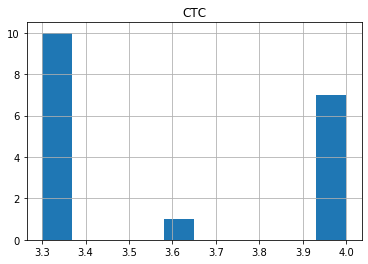

In [24]:

print("Tier 3")
df3.hist(column=["CTC"])